<div>
<h1>Tempo and Beat</h1> 
</div>


## Basic Notions and Assumptions

Temporal and structural regularities are perhaps the most important incentives for people to get involved and to interact with music. 

It is the **beat** that drives music forward and provides the temporal framework of a piece of music. Intuitively, the beat corresponds to the pulse a human taps along when listening to music. 

The beat is often described as a sequence of perceived pulse positions, which are typically equally spaced in time and specified by two parameters: the **phase** and the **period**. 

The term **tempo** refers to the rate of the pulse and is given by the  reciprocal of the beat period. The following figure illustrates these notions using the beginning of "Another one bites the dust" by Queen.

<img src="data/img/Queen2.png" width="700px" align="left">

<br clear="all" />

<audio style="width: 320px;" src="data/audio/Queen.wav" controls="controls"></audio>

The extraction of tempo and beat information from audio recordings is a challenging problem, in particular for music with weak note onsets and local tempo changes. For example, in the case of romantic piano music, the pianist often takes the freedom of speeding up and slowing down the tempo&mdash;an artistic means also referred to as **tempo rubato**. There is a wide range of music where the notions of tempo and beat remain rather vague or are even nonexistent.  Sometimes, the rhythmic flow of music is deliberately interrupted or disturbed by **syncopation**, where certain notes outside the regular grid of beat positions are stressed. The following audio example indicate some of the challenges:


Music with weak onsets (Borodin, String Quartet No. 2, 3rd movement):<br>
<audio style="width: 320px;" src="data/audio/Audio_Borodin_RWC.wav" controls="controls"></audio>

Romantic music with local tempo fluctuations (rubato) and global tempo changes (Chopin, Op.68, No. 3):<br>
<audio style="width: 320px;" src="data/audio/Audio_Chopin.wav" controls="controls"></audio>

Music with syncopation (Fauré, Op.15):<br>
<audio style="width: 320px;" src="data/audio/Audio_Faure.wav" controls="controls"></audio>

To make the problem of tempo and beat tracking feasible, most automated approaches rely on two basic assumptions. 

* The first assumption is that beat positions occur at note onset positions.
* The second assumption is that beat positions are more or less equally spaced&mdash;at least for a certain period of time.

Even though both assumptions may be violated and inappropriate for certain types of music, they are convenient and reasonable for a wide range of music including most rock and popular songs.

In the following code cell, we present for each of the above examples a visualization of a **spectral-based novelty function** along with manually annotated beat positions (**quarter note level**). Furthermore, a **sonification** indicates the annotated beats by short click sounds placed on top of the original music recordings. 

In [2]:
import os, sys
import sys
import numpy as np
from scipy import signal
from  matplotlib import pyplot as plt
import librosa
import IPython.display as ipd

In [3]:
def compute_local_average(x, M_sec, Fs=1):
    """Compute local average of signal
    """
    L = len(x)
    M = int(np.ceil(M_sec * Fs))
    local_average = np.zeros(L)
    for m in range(L):
        a = max(m - M, 0)
        b = min(m + M + 1, L)
        local_average[m] = (1 / (2 * M + 1)) * np.sum(x[a:b])
    return local_average

def compute_novelty_spectrum(x, Fs=1, N=1024, H=256, gamma=100, M=10, norm=1):
    """Compute spectral-based novelty function
    """
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hanning')
    Fs_feature = Fs / H
    Y = np.log(1 + gamma * np.abs(X))
    Y_diff = np.diff(Y)
    Y_diff[Y_diff < 0] = 0
    novelty_spectrum = np.sum(Y_diff, axis=0)
    novelty_spectrum = np.concatenate((novelty_spectrum, np.array([0.0])))
    if M > 0:
        local_average = compute_local_average(novelty_spectrum, M)
        novelty_spectrum = novelty_spectrum - local_average
        novelty_spectrum[novelty_spectrum < 0] = 0.0
    if norm == 1:
        max_value = max(novelty_spectrum)
        if max_value > 0:
            novelty_spectrum = novelty_spectrum / max_value
    return novelty_spectrum, Fs_feature

borodin_beats = [0.429206349, 1.480272109, 2.364081633, 3.300770975, 4.312380952, 5.163537415, 
                 6.07292517, 6.946394558, 7.886802721, 8.744580499, 9.695782313,10.65360544,
                 11.72530612,12.63673469,13.4922449,14.40507937,15.29469388,16.20027211,17.01587302,
                 18.03755102,18.85823129,19.74780045,20.62367347,21.50530612,22.60244898,23.58639456,
                 24.56163265,25.37310658,26.30965986,27.15428571,28.0152381,29.0677551,29.87755102,
                 30.76952381,31.75183674,32.66176871,33.51428571,34.61659864,35.5352381,36.38603175,
                 37.44653061,38.31727891]
chopin_beats = [0.28122449, 1.041269841, 1.68122449, 2.321269841, 2.92122449, 3.50122449, 4.161315193,
                4.731292517, 5.5169161, 6.291247166, 7.304852608,8.513015873,9.72122449,10.10122449,
                10.47129252,10.81129252,11.18131519,11.55129252,11.89129252,12.24122449,12.61129252,
                12.95129252,13.31129252,13.67129252,13.99129252,14.35129252,14.65396825,14.97129252,
                15.29129252,15.61129252,15.97129252,16.29129252,16.60122449,16.92126984,17.26331066,
                17.56122449,17.97129252,18.37129252,18.65070295,19.02512472,19.32126984,19.62126984,
                20.04122449,20.39510204,20.70122449,21.0568254,21.46126984,21.95129252,23.01129252,
                23.79129252,24.43129252,25.08122449,25.74122449,26.41129252,27.08126984,27.78122449,
                28.35129252,29.01129252,29.70122449,30.43129252]
faure_beats = [1.330068027, 2.195011338, 3.001904762, 3.770340136, 4.558367347, 5.372517007, 6.13877551, 
               6.942040816, 7.801904762, 8.602993197, 9.508571429, 10.38802721]

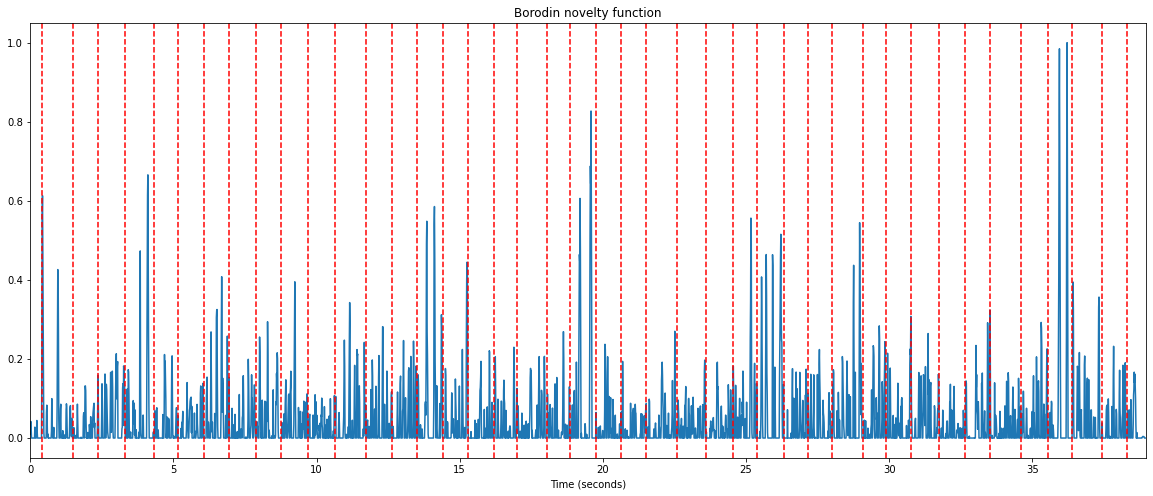

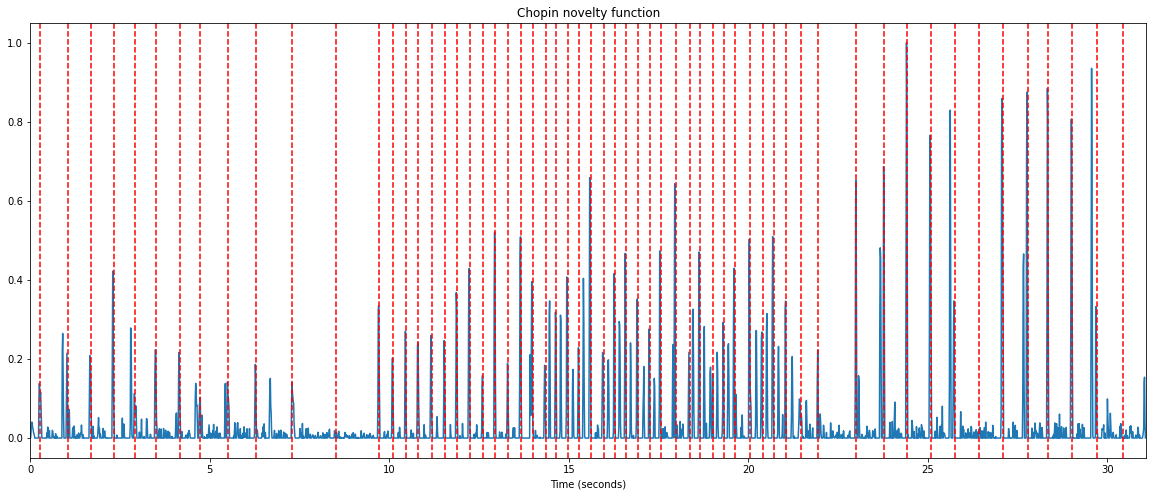

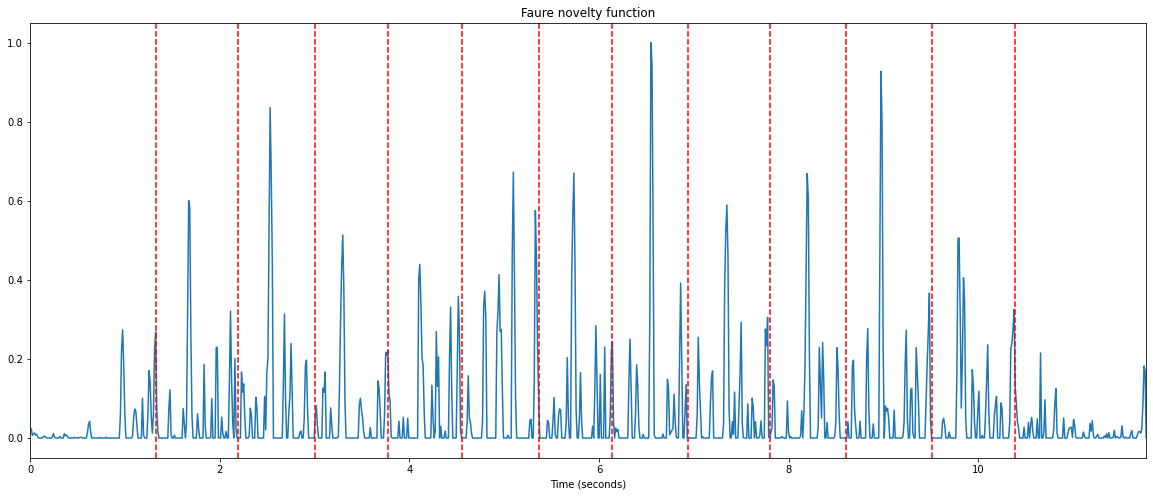

In [8]:
fn_wav = os.path.join('data','audio', 'Audio_Borodin_RWC.wav')
x, Fs = librosa.load(fn_wav, sr=None)
nov, Fs_nov =compute_novelty_spectrum(x, Fs=Fs, N=2048, H=256, gamma=1, M=10, norm=1)
feature_time_axis = np.arange(nov.shape[0]) / Fs_nov
plt.figure(figsize=(20, 8))
plt.xlim([feature_time_axis[0], feature_time_axis[-1]])
plt.title('Borodin novelty function')
plt.xlabel('Time (seconds)')
plt.plot(feature_time_axis, nov)

for b in borodin_beats:
    plt.axvline(b, color='red', linestyle='--')   
x_beats = librosa.clicks(borodin_beats, sr=Fs, click_freq=1000, length=len(x))

ipd.display(ipd.Audio(x + x_beats, rate=Fs))

fn_wav = os.path.join('data','audio', 'Audio_Chopin.wav')
x, Fs = librosa.load(fn_wav, sr=None)
nov, Fs_nov =compute_novelty_spectrum(x, Fs=Fs, N=2048, H=256, gamma=1, M=10, norm=1)
feature_time_axis = np.arange(nov.shape[0]) / Fs_nov
plt.figure(figsize=(20, 8))
plt.xlim([feature_time_axis[0], feature_time_axis[-1]])
plt.title('Chopin novelty function')
plt.xlabel('Time (seconds)')

plt.plot(feature_time_axis, nov)
for b in chopin_beats:
    plt.axvline(b, color='red', linestyle='--')
x_beats = librosa.clicks(chopin_beats, sr=Fs, click_freq=1000, length=len(x))

ipd.display(ipd.Audio(x + x_beats, rate=Fs))

fn_wav = os.path.join('data','audio', 'Audio_Faure.wav')
x, Fs = librosa.load(fn_wav, sr=None)
nov, Fs_nov =compute_novelty_spectrum(x, Fs=Fs, N=2048, H=256, gamma=1, M=10, norm=1)

feature_time_axis = np.arange(nov.shape[0]) / Fs_nov
plt.figure(figsize=(20, 8))
plt.xlim([feature_time_axis[0], feature_time_axis[-1]])
plt.title('Faure novelty function')
plt.xlabel('Time (seconds)')
plt.plot(feature_time_axis, nov)

for b in faure_beats:
    plt.axvline(b, color='red', linestyle='--')
x_beats = librosa.clicks(faure_beats, sr=Fs, click_freq=1000, length=len(x))

ipd.display(ipd.Audio(x + x_beats, rate=Fs))

## Pulse Levels

One major problem in determining the tempo of a music recording arises from the fact that pulses in music are often organized in complex hierarchies that represent the rhythm. In particular, there are various levels that are presumed to contribute to the human perception of tempo and beat. The **tactus** level typically corresponds to the quarter note level and often matches the foot tapping rate. Thinking at a larger musical scale, one may also perceive the tempo at the **measure** level, in particular when listening to fast music or to highly expressive music with strong rubato. Finally, one may also consider the **tatum** (temporal atom) level, which refers to the fastest repetition rate of musically meaningful accents occurring in the signal. The next example illustrates these notions using the song "Happy Birthday to you."

<img src="data/img/pulse_levels.png" width="500px" align="left" alt="FMP_C6_F12.png">

<br clear="all" />

<audio src="data/audio/Audio_HappyBirthday.wav" controls="controls"></audio>



## Tempo Octave, Harmonic, and Subharmonic

Often the tempo ambiguity that arises from the existence of different pulse levels is also reflected in a tempogram $\mathcal{T}$. Higher pulse levels often correspond to integer multiples $\tau,2\tau,3\tau,\ldots$ of a given tempo $\tau$. As with pitch, we call such integer multiples **(tempo) harmonics** of $\tau$. Furthermore, integer fractions $\tau,\tau/2,\tau/3,\ldots$ are referred to as **(tempo) subharmonics** of $\tau$. Analogous to the notion of an octave for musical pitches, the difference between two tempi with half or double 
the value is called a **tempo octave**. 

# Tempogram Representations

In Fourier analysis, a (magnitude) spectrogram is a time&ndash;frequency representations of a given signal. A large value $\mathrm{Spec}(t,\omega)$ of a spectrogram indicates that the signal contains at time instance $t$ a periodic component that corresponds to the frequency $\omega$. 

We now introduce a similar concept referred to as a **tempogram**, which indicates for each time instance the local relevance of a specific tempo for a given music recording. Mathematically, we model a tempogram as a function

\begin{equation}
   \mathcal{T}:\mathbb{R}\times \mathbb{R}_{>0}\to \mathbb{R}_{\geq 0}
\end{equation}  

depending on a time parameter $t\in\mathbb{R}$ measured in seconds and a tempo parameter $\tau \in \mathbb{R}_{>0}$ measured in beats per minute (BPM). 

Intuitively, the value $\mathcal{T}(t,\tau)$ indicates the extent to which the signal contains a locally periodic pulse of a given tempo $\tau$  in a neighborhood of time instance $t$. Just as with spectrograms, one computes a tempogram in practice only on a discrete time&ndash;tempo grid. As before, we assume that the sampled time axis is given by  $[1:N]$. To avoid boundary cases and to simplify the notation in the subsequent considerations, we extend this axis to $\mathbb{Z}$. Furthermore, let $\Theta\subset\mathbb{R}_{>0}$ be a finite set of tempi specified in $\mathrm{BPM}$. 
Then, a **discrete tempogram** is a function 

\begin{equation}
   \mathcal{T}:\mathbb{Z}\times \Theta\to \mathbb{R}_{\geq 0}.
\end{equation}

Most approaches for deriving a tempogram representation from a given audio recording proceed in two steps. 

* Based on the assumption that pulse positions usually go along with note onsets, the music signal is first converted into a novelty function. This function typically consists of impulse-like spikes, each indicating a note onset position.
* In the second step, the locally periodic behavior of the novelty function is analyzed. 

To obtain a tempogram, one quantifies the periodic behavior for various periods $T>0$ (given in seconds) in a neighborhood of a given time instance. The rate $\omega=1/T$ (measured in $\mathrm{Hz}$) and the tempo $\tau$ (measured in $\mathrm{BPM}$) are related by 

\begin{equation}
   \tau = 60 \cdot \omega.
\end{equation}  

For example, a sequence of impulse-like spikes that are regularly spaced with period $T=0.5~\mathrm{sec}$ corresponds to a rate of $\omega=1/T=2~\mathrm{Hz}$ or a tempo of $\tau=120~\mathrm{BPM}$.

## Autocorrelation Tempogram

###  Short-Time Autocorrelation

Imagine to apply autocorrelation in a local fashion for analyzing a given novelty function $\Delta :\mathbb{Z}\to\mathbb{R}$ in the neighborhood of a given time parameter $n$. To this end, we fix a window function $w:\mathbb{Z}\to\mathbb{R}$. The windowed version $\Delta_{w,n}:\mathbb{Z}\to\mathbb{R}$ localized at point $n\in\mathbb{Z}$ is defined by

\begin{equation}
  \Delta_{w,n}(m):=\Delta(m)w(m-n),
\end{equation}

$m\in\mathbb{Z}$. 

To obtain the **short-time autocorrelation** $\mathcal{A}:\mathbb{Z}\times\mathbb{Z}\to\mathbb{R}$, we compute the autocorrelation of $\Delta_{w,n}$ for a specific lag $k$:

\begin{equation}
\mathcal{A}(n, k) := \sum_{m\in\mathbb{Z}}\Delta_{w,n}(m) \Delta_{w,n}(m-k).
\end{equation}

In the following, we assume that the window function $w:[0:N-1]\to\mathbb{R}$ has finite length $N\in\mathbb{N}$. 
Then the autocorrelation of the localized novelty function is zero for all but a finite number of time lag parameters. More precisely, one can show that $\mathcal{A}(n,k)=0$ for $|k|> N$. Because of this property and the symmetry of the autocorrelation, one only needs to consider the time lag parameters $k\in[0:N-1]$.  

Visualizing the short-time autocorrelation $\mathcal{A}$ leads to a **time&ndash;lag representation** with a frame parameter $n\in\mathbb{Z}$ and a lag parameter $k \in[0:N-1]$.

### Autocorrelation Tempogram

To obtain a time&ndash;tempo representation from the time&ndash;lag representation, one needs to convert the lag parameter $k$ into a tempo parameter, that we are going to indicate with $\tau$. 

To this end, we need the frame rate or time resolution of the novelty function. 
Suppose that each time frame corresponds to $r$ seconds, then a time lag of $k$ (given in frames) corresponds to $k\cdot r$ seconds. Since a shift of $k\cdot r$ seconds corresponds to a rate of $1/(k\cdot r)~\mathrm{Hz}$, one obtains the tempo

\begin{equation}
   \tau = \frac{60}{r\cdot k}~\mathrm{BPM}.
\end{equation}

As an example, let us assume that the feature rate of the novelty function $\Delta$ is $F_\mathrm{s} = 100~\mathrm{Hz}$ and $r=0.01~\mathrm{sec}$. In this case, the lag parameter $k=10$ corresponds to $600~\mathrm{BPM}$ and $k=200$ corresponds to $30~\mathrm{BPM}$. To obtain tempo values in a meaningful range, one uses in practice a maximum lag parameter $k_\mathrm{max}$ to specify the minimum tempo and a minimum lag parameter $k_\mathrm{min}$ to specify the maximum tempo. Note that when using a window length $N$, one needs to 

$$
      1\leq  k_\mathrm{min} \leq k_\mathrm{max} \leq N-1
$$

Based on the conversion from lag to BPM, the lag axis can be interpreted as a tempo axis. This allows us to define the **autocorrelation tempogram** $\mathcal{T}^\mathrm{A}$ by setting

\begin{equation}
\mathcal{T}^\mathrm{A}(n,\tau) := \mathcal{A}(n,k)
\end{equation}

for each tempo $\tau=60/(r\cdot k)$ with $k\in[ k_\mathrm{min}: k_\mathrm{max}]$.

## Example
The following example shows a the autocorrelation tempogram for a click track of increasing tempo (raising from $170$ to $200~\mathrm{BPM}$ over the course of $20~\mathrm{sec}$). The autocorrelation based tempogram emphasizes tempo subharmonics. The entry marked by the red rectangle indicates that the music signal has a dominant tempo of $\tau=180~\mathrm{BPM}$ around time position $t=5~\mathrm{sec}$.

<img src="data/img/autocorrelation_tempogram.png" width="600px" align="left">


<br clear="all" />

<audio style="width: 320px;" src="data/audio/Audio_IncreasingTempo.wav" controls="controls"></audio>



## Global Tempo

Assuming a more or less steady tempo, it suffices to determine one **global** tempo value for the entire recording. Such a value may be obtained by averaging the tempo values obtained from a frame-wise periodicity analysis. For example, based on a tempogram representation, one can average the tempo values over all time frames to obtain a function $\mathcal{T}_\mathrm{Average}:\Theta\to\mathbb{R}_{\geq 0}$ that only depends on $\tau\in\Theta$. Assuming that the relevant time positions lie in the interval $[1:N]$, one may define $\mathcal{T}_\mathrm{Average}$ by

\begin{equation}
\label{eq:BeatTempo:TempoAna:AutoCor:TempoAv}
   \mathcal{T}_\mathrm{Average}(\tau) := \frac{1}{N}\sum_{n\in[1:N]} \mathcal{T}(n,\tau).
\end{equation}

The maximum 

\begin{equation}
\label{eq:BeatTempo:TempoAna:AutoCor:TempoAvMax}
   \hat{\tau} := \max\{\mathcal{T}_\mathrm{Average}(\tau)\,\mid\, \tau\in\Theta\}
\end{equation}

of this function then yields an estimate for the global tempo of the recording.  Of course, more refined methods for estimating a single tempo value may be applied. For example, instead of using a simple average, one may apply median filtering, which is more robust to outliers and noise. 